In [1]:
import pandas as pd
from dateutil import parser


In [8]:
a=pd.read_csv("metadata2.csv", index_col=False)

In [9]:
b=pd.read_csv("metadata1.csv", index_col=False)

In [10]:
c=pd.read_csv("metadata3.csv", index_col=False)

In [11]:
d=pd.read_csv("metadata4.csv", index_col=False)

C:\Users\lucia\AppData\Local\Temp\ipykernel_1416\809333628.py:1: DtypeWarning: Columns (9,21) have mixed types. Specify dtype option on import or set low_memory=False.
  d=pd.read_csv("metadata4.csv", index_col=False)


In [12]:
e=pd.read_csv("metadata5.csv", index_col=False)

C:\Users\lucia\AppData\Local\Temp\ipykernel_1416\2168002543.py:1: DtypeWarning: Columns (8,9,14,17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  e=pd.read_csv("metadata5.csv", index_col=False)


In [13]:
f=pd.read_csv("metadata6.csv", index_col=False)

C:\Users\lucia\AppData\Local\Temp\ipykernel_1416\2870896456.py:1: DtypeWarning: Columns (9,13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  f=pd.read_csv("metadata6.csv", index_col=False)


In [14]:
g=pd.read_csv("metadata7.csv", index_col=False)

In [17]:
books=pd.concat([a,b,c,d,e,f,g])

In [19]:
books=books.drop_duplicates()

In [20]:
books

,id,title,author,camera,contributor,publish_date,language,operator,ppi,repub_state,...,scandate,imagecount,republisher_operator,republisher_date,republisher_time,scanfee,sponsordate,ocr_converted,page_number_confidence,search_date
0,papuaorbritishn01murrgoog,Papua; Or British New Guinea,John Hubert Plunkett Murray,NaN,University of California,1912,English,NaN,NaN,4.0,...,20071011000000,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-09-07 20:29:13
1,speechestheirpr00burtgoog,Speeches; their preparation and their delivery,Burton Alexander,NaN,University of California,1922,eng,NaN,NaN,4.0,...,20071206,263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-09-07 10:01:22
2,riseandprogress01penngoog,The rise and progress of the people called Qua...,Penn William 1644-1718,NaN,Harvard University,1976,eng,NaN,600.0,4.0,...,20060519000000,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-13 11:21:50
3,journalasiatiqu27frangoog,Journal asiatique,Société asiatique (Paris France),NaN,University of Michigan,1822,fre,NaN,NaN,4.0,...,20050715,550.0,NaN,NaN,NaN,NaN,NaN,abbyy-to-hocr 1.1.11,97.64,2008-10-14 12:46:51
4,mmoiresdelasoci03laugoog,Mémoires de la Société académique d'agricultur...,Société académique d 'agriculture des science...,NaN,University of Michigan,1885,French,NaN,NaN,4.0,...,20071023000000,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-02-02 06:12:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176476,hannahsdreamnove00hamm_0,Hannah's dream,Diane Coplin Hammond,NaN,Internet Archive,2008,eng,associate-tao-bin@archive.org,300.0,22.0,...,20180721171123,342.0,associate-hubizhong@archive.org,2.018110e+13,715.0,0;1.45;0,20181231,abbyy-to-hocr 1.1.20,93.82,2013-03-13 19:48:11
176477,miscellaniesold00smitgoog,Miscellanies old and new,Smith John Cotton 1826-1882,NaN,Oxford University,1876,eng,NaN,600.0,4.0,...,20070613,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-27 05:30:52
176478,sizemattershardf0000fisc,Size matters : the hard facts about male sexua...,Fisch Harry 1958-,Sony Alpha-A6300 (Control),Internet Archive,2008,eng,associate-fritzijuls-quiroben@archive.org,300.0,19.0,...,20201112034923,214.0,associate-mariorenier-teano@archive.org,2.020111e+13,409.0,0;1.00;200,20201231,NaN,93.87,2020-11-12 02:10:48
176479,ecotourismconser00stro,Ecotourism and conservation in the Americas,NaN,NaN,Library Genesis,2008,eng,NaN,300.0,4.0,...,2011-06-04 13:46:07,290.0,NaN,NaN,NaN,NaN,2012-03-09 13:11:42,NaN,NaN,2013-07-22 20:02:25


In [218]:
books.to_csv("full.csv")

In [2]:
books=pd.read_csv("IA_metadata_full.csv")

C:\Users\lucia\AppData\Local\Temp\ipykernel_10944\2596458106.py:1: DtypeWarning: Columns (10,11,16,19,23) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("IA_metadata_full.csv")


In [89]:
g=pd.read_csv("metadata7.csv", index_col=False)

In [90]:
books=pd.concat([books,g])

In [3]:
books=books.drop(["Unnamed: 0"], axis=1)

In [4]:
books=books.drop_duplicates()

In [5]:
def convert_datetime(datestring):
    datestring=str(datestring)
    if "-" in datestring:
        try:
            return parser.parse(datestring)
        except:
            print(datestring)
            return None
    try:
        return parser.parse(datestring[:8])
    except:
        return None

In [158]:
books["date"]=pd.to_datetime(books["date"], errors='coerce')

In [163]:
books["date"].dropna()

0         2007-10-11
1         2007-12-06
2         2006-05-19
3         2005-07-15
4         2007-10-23
             ...    
2972188   2006-07-19
2972189   2007-09-12
2972190   2007-08-24
2972191   2006-02-07
2972193   2006-03-01
Name: date, Length: 2905628, dtype: datetime64[ns]

In [199]:
books["year"]=books['date'].map(lambda x: x.year)
books["month"]=books['date'].map(lambda x: x.month)

In [15]:
import pandas as pd
books=pd.read_csv("IA_metadata_full.csv")
books=books.dropna(subset=["date", "scanningcenter"])
toplot=books.groupby(["year", "month", "scanningcenter"]).count()
plotting=pd.DataFrame(toplot)
plotting=plotting.reset_index()
pivot=plotting.pivot(index=["year", "month"], columns="scanningcenter", values="id")
pivot.to_csv("centers_per_year.csv")

C:\Users\lucia\AppData\Local\Temp\ipykernel_3884\2361913433.py:1: DtypeWarning: Columns (10,11,16,19,23) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("IA_metadata_full.csv")


In [6]:
books=books.dropna(subset=["date", "scanningcenter"])

In [8]:
toplot=books.groupby(["year", "month", "scanningcenter"]).count()

In [9]:
plotting=pd.DataFrame(toplot)

In [239]:
plotting["Unnamed: 0"]

year    month
2001.0  12.0         1
2002.0  1.0         10
2006.0  3.0        102
        4.0        860
        5.0       2261
                 ...  
2022.0  6.0      31333
        7.0      23672
        8.0      21148
        9.0          2
        10.0         2
Name: Unnamed: 0, Length: 202, dtype: int64

<AxesSubplot:title={'center':'All IA scanned books'}, xlabel='year,month'>

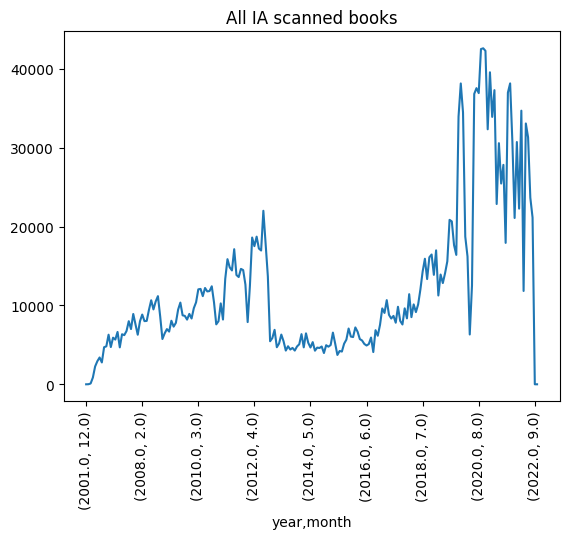

In [242]:
plotting["Unnamed: 0"].plot(title="All IA scanned books",rot=90)

In [10]:
plotting=plotting.reset_index()

In [11]:
pivot=plotting.pivot(index=["year", "month"], columns="scanningcenter", values="id")

In [13]:
pivot.to_csv("centers_per_year.csv")

<AxesSubplot:title={'center':'Books by scanning center'}, xlabel='year,month'>

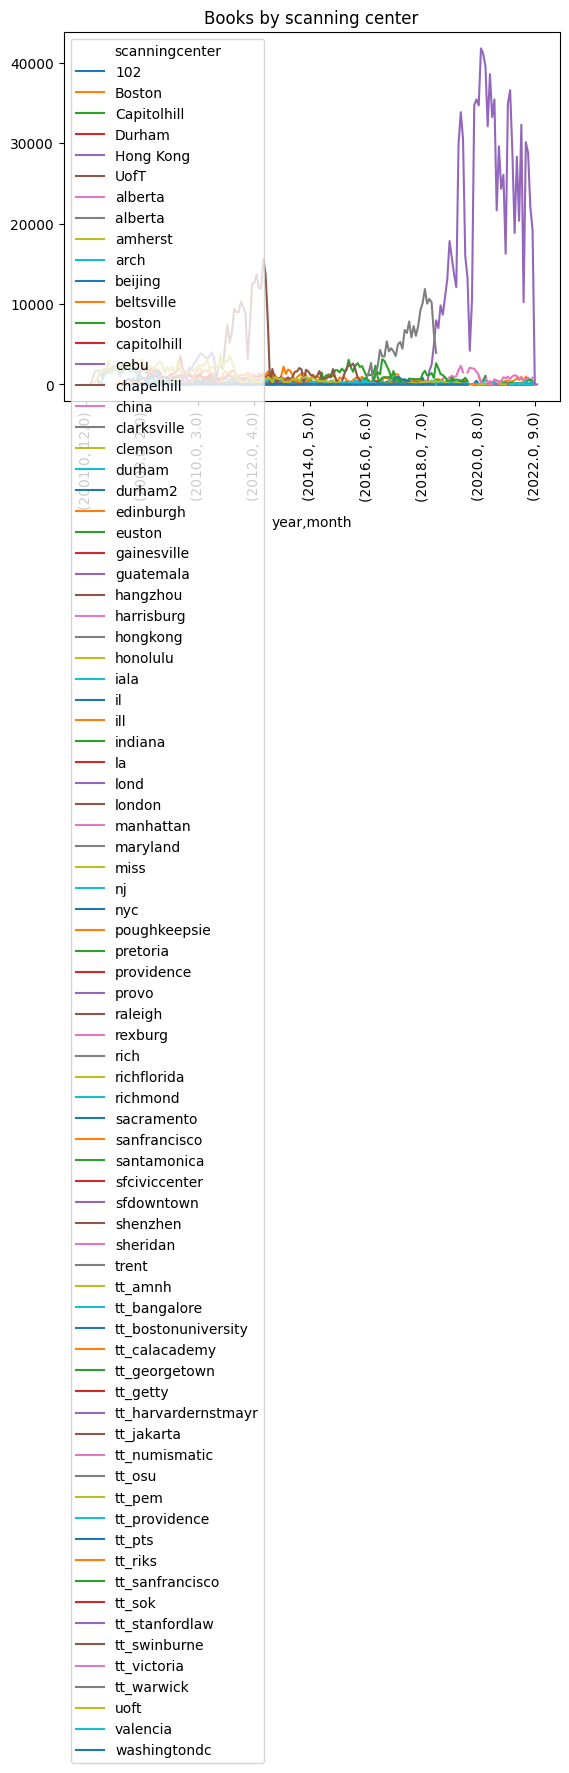

In [14]:
pivot.plot(title="Books by scanning center", rot=90)

In [147]:
s = books['date'].value_counts().sort_index()

In [151]:
books['date'].groupby(books['date'].date.dt.year)

AttributeError: 'Series' object has no attribute 'date'

<AxesSubplot:>

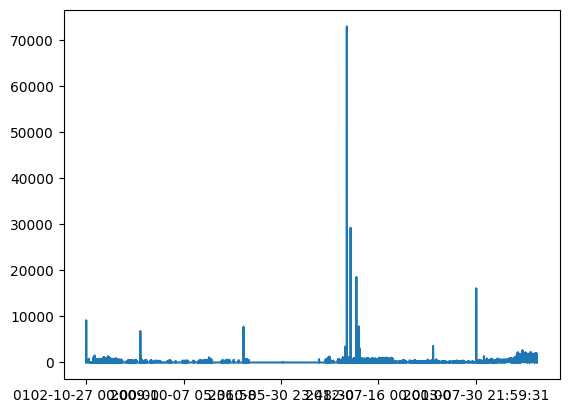

In [148]:
s.plot()

In [146]:
ax = books["date"].plot.hist(bins=12, alpha=0.5)

TypeError: no numeric data to plot

In [121]:
books["date"].isna().sum()

66562

In [ ]:
books["scandate"]=pd.to_datetime(books["scandate"], infer_datetime_format=True)

In [99]:
books.columns

Index(['id', 'title', 'author', 'camera', 'contributor', 'publish_date',
       'language', 'operator', 'ppi', 'repub_state', 'scanner',
       'scanningcenter', 'sponsor', 'scandate', 'imagecount',
       'republisher_operator', 'republisher_date', 'republisher_time',
       'scanfee', 'sponsordate', 'ocr_converted', 'page_number_confidence',
       'search_date'],
      dtype='object')

In [144]:
books["scanningcenter"].value_counts()

cebu                   869328
china                   27216
beltsville              11654
euston                   5802
nj                       3382
il                       1958
chapelhill               1862
alberta                  1543
indiana                  1263
boston                   1251
durham                    811
capitolhill               788
uoft                      576
tt_numismatic             499
provo                     462
providence                418
sanfrancisco              408
tt_osu                    346
santamonica               312
valencia                  276
tt_georgetown             184
tt_providence             178
tt_sok                     59
washingtondc               26
london                     19
ill                        14
tt_harvardernstmayr        13
rich                       13
tt_stanfordlaw              9
clarksville                 2
sheridan                    1
102                         1
guatemala                   1
tt_pts    

In [127]:
startdate=parser.parse("2020-01-01")

In [129]:
books=books[~books["operator"].isnull()]

In [128]:
books=books[books["date"]>startdate]

In [130]:
operator=books["operator"]

In [131]:
republisher=books["republisher_operator"]

In [132]:
operator.value_counts()

associate-diane-reyes@archive.org            13222
associate-rhialyn-opena@archive.org          11047
associate-joannemay-mag-usara@archive.org    11041
associate-mervin-collantes@archive.org       10936
associate-annie-larano@archive.org           10625
                                             ...  
associate-jovelyn-comilang@archive.org           1
scanner-gwen-amsbury                             1
blalfaro@law.stanford.edu                        1
Archivebooks03.cebu@archive.org                  1
paul-nguyen                                      1
Name: operator, Length: 450, dtype: int64

In [133]:
all_emails=list(republisher)+list(operator)

In [134]:
len(all_emails)

1861372

In [135]:
all_emails=list(set(all_emails))

In [136]:
all_emails[1:]

['associate-jannel-pelayre@archive.org;associate-philfrancis-otadoy@archive.org',
 'associate-ruffamae-precillas@archive.org;associate-mavanessa-cando@archive.org',
 'associate-marycris-avenido@archive.org;aababon@innodata.com',
 'associate-ronamye-cabale@archive.org;associate-daisy-oaper@archive.org',
 'associate-ronil-villaceran@archive.org;supervisor-leonette-monsanto@archive.org',
 'associate-joemel-gerundio@archive.org;supervisor-ria-gargoles@archive.org',
 'associate-angeliquefaith-eulalio@archive.org;supervisor-carla-igot@archive.org',
 'associate-faradila-trevino@archive.org;associate-mae-mirafuentes@archive.org',
 'associate-mavanessa-cando@archive.org;associate-glennblair-beduya@archive.org',
 'associate-irene-capada@archive.org;associate-cruz-pelayre@archive.org;associate-glennblair-beduya@archive.org;associate-ritzell-pardillo@archive.org',
 'associate-anjelou-bitayo@archive.org;associate-louiseviktoria-saligumba@archive.org',
 'associate-genevieve-dimiao@archive.org;associ

In [137]:
final=[]
for a in all_emails[1:]:
    if "@" in a:
        if ";" in a:
            final.append(a.split(";")[0])
            final.append(a.split(";")[1])
        else:
            final.append(a)

In [138]:
final

['associate-jannel-pelayre@archive.org',
 'associate-philfrancis-otadoy@archive.org',
 'associate-ruffamae-precillas@archive.org',
 'associate-mavanessa-cando@archive.org',
 'associate-marycris-avenido@archive.org',
 'aababon@innodata.com',
 'associate-ronamye-cabale@archive.org',
 'associate-daisy-oaper@archive.org',
 'associate-ronil-villaceran@archive.org',
 'supervisor-leonette-monsanto@archive.org',
 'associate-joemel-gerundio@archive.org',
 'supervisor-ria-gargoles@archive.org',
 'associate-angeliquefaith-eulalio@archive.org',
 'supervisor-carla-igot@archive.org',
 'associate-faradila-trevino@archive.org',
 'associate-mae-mirafuentes@archive.org',
 'associate-mavanessa-cando@archive.org',
 'associate-glennblair-beduya@archive.org',
 'associate-irene-capada@archive.org',
 'associate-cruz-pelayre@archive.org',
 'associate-anjelou-bitayo@archive.org',
 'associate-louiseviktoria-saligumba@archive.org',
 'associate-genevieve-dimiao@archive.org',
 'associate-roche-borja@archive.org',
 

In [139]:
final=set(final)

In [141]:
len(final)

491

In [142]:
books.to_csv("operator_emails.csv")

KeyboardInterrupt: 

In [143]:
with open('emails.csv', 'w',encoding="utf-8") as f:
    for line in final:
        print(line)
        f.write("%s\n" % line)

associate-gina-lanoy@archive.org
associate-cyrylejick-limosnero@archive.org
associate-mark-turnbull@archive.org
associate-jebriel-guritan@archive.org
associate-mylene-villafuerte@archive.org
associate-daniel-euphrat@archive.org
associate-wilfredo-saladores@archive.org
associate-markpaul-bontilao@archive.org
carl+sok_blr@resource.org
associate-rhesamae-gungob@archive.org
associate-philipmagua-rabaya@archive.org
rocabadk@georgetown.edu
associate-jayanne-esdrelon@archive.org
madelinfranco@ufm.edu
associate-ella-hitchcock@archive.org
Associate-markrandy-calimpon@archive.org
associate-guiamar-delcoro@archive.org
associate-arianefaye-rodrigo@gmail.com
associate-marve-boquila@archive.org
associate-jobileeh-baguio@archive.org
associate-arjie-bayagna@archive.org
Archivebooks03.cebu@archive.org
associate-daisy-oaper@gmail.com
associate-lixiaojie@archive.org
angela.dugas@archive.org
associate-jessanen-becari@archive.org
associate-shairamae-ventura@archive.org
associate-colette-nadon@archive.org
a